## TCC do curso de Data science e machine learning

#### Aluno: Rafael de Medeiros Mariz Capuano



### Obtenção  e formatação de dados

In [1]:
#importação de bibliotecas
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from numpy import genfromtxt
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from plotly import graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_iris
from sklearn import tree
from keras.layers import Dense

### Coleta  e análise de dados preço dólar

In [2]:
#carregar dados câmbio
df_dolar=pd.read_csv("USD_BRL Dados Históricos_1.csv")


In [3]:
#ajuste
df_dolar= df_dolar.iloc[::-1].reset_index(drop=True)
df_dolar.rename(columns = {'Date':'Data','Vol.':'Volume', 'Var%':'Variação'},inplace=True)


In [4]:
#os 10 primeiros
df_dolar.head(10)

Data  Último Abertura  Máxima  Mínima Variação
0  02.01.2017  3,2857   3,2538  3,2887  3,2516    0,95%
1  03.01.2017  3,2652   3,2824  3,2928  3,2466   -0,62%
2  04.01.2017  3,2163   3,2517  3,2517  3,2100   -1,50%
3  05.01.2017  3,1990   3,2163  3,2294  3,1928   -0,54%
4  06.01.2017  3,2241   3,1973  3,2241  3,1871    0,78%
5  09.01.2017  3,1969   3,2244  3,2317  3,1894   -0,84%
6  10.01.2017  3,1961   3,1959  3,2020  3,1808   -0,03%
7  11.01.2017  3,1975   3,1960  3,2313  3,1775    0,04%
8  12.01.2017  3,1881   3,1967  3,1993  3,1522   -0,29%
9  13.01.2017  3,2213   3,1887  3,2242  3,1798    1,04%

In [5]:
#informação
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      1305 non-null   object
 1   Último    1305 non-null   object
 2   Abertura  1305 non-null   object
 3   Máxima    1305 non-null   object
 4   Mínima    1305 non-null   object
 5   Variação  1305 non-null   object
dtypes: object(6)
memory usage: 61.3+ KB


In [6]:
#Ajuste na coluna data
df_dolar = df_dolar.replace({',': '.'}, regex=True)


df_dolar['Data'] = pd.to_datetime(df_dolar.Data)
df_dolar['Último']= df_dolar.Último.apply(pd.to_numeric)
df_dolar['Abertura']= df_dolar.Abertura.apply(pd.to_numeric)
df_dolar['Máxima']= df_dolar.Máxima.apply(pd.to_numeric)
df_dolar['Mínima']= df_dolar.Mínima.apply(pd.to_numeric)
df_dolar['Variação'] = df_dolar['Variação'].str.rstrip("%").astype(float)/100

In [ ]:
df_dolar.head(10)

In [8]:
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1305 non-null   datetime64[ns]
 1   Último    1305 non-null   float64       
 2   Abertura  1305 non-null   float64       
 3   Máxima    1305 non-null   float64       
 4   Mínima    1305 non-null   float64       
 5   Variação  1305 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 61.3 KB


In [9]:
#verificar nulos
df_dolar.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Variação    0
dtype: int64

In [17]:
# verificar duplicatas
df_dolar.duplicated().sum()

0

### Coleta e análise de dados sobre bovespa

In [10]:
#coleta dados bovespa

import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

start_date = "2017-01-02"
end_date = "2021-12-31"


df_bvsp = yf.download('^BVSP', start=start_date, end=end_date, time_interval='daily')


[*********************100%***********************]  1 of 1 completed


In [11]:
#10 primeros
df_bvsp.head()

Open     High      Low    Close  Adj Close   Volume
Date                                                              
2017-01-02  60227.0  60227.0  59371.0  59589.0    59589.0   808700
2017-01-03  59631.0  61815.0  59631.0  61814.0    61814.0  3328300
2017-01-04  61811.0  61940.0  61302.0  61589.0    61589.0  2840800
2017-01-05  61594.0  62409.0  61594.0  62071.0    62071.0  3313000
2017-01-06  62072.0  62072.0  61396.0  61665.0    61665.0  2374800

In [12]:
#info

df_bvsp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2017-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [13]:
#descrever
df_bvsp.describe()

Open           High            Low          Close  \
count    1235.000000    1235.000000    1235.000000    1235.000000   
mean    93178.101215   94085.503644   92297.711741   93214.800000   
std     18659.836959   18730.554999   18538.481708   18640.101787   
min     59631.000000   60227.000000   59371.000000   59589.000000   
25%     76673.000000   77706.000000   76034.500000   76716.000000   
50%     95384.000000   96339.000000   94334.000000   95369.000000   
75%    107233.500000  108243.500000  106296.000000  107296.500000   
max    130776.000000  131190.000000  129526.000000  130776.000000   

           Adj Close        Volume  
count    1235.000000  1.235000e+03  
mean    93214.800000  6.199620e+06  
std     18640.101787  3.495101e+06  
min     59589.000000  0.000000e+00  
25%     76716.000000  3.488700e+06  
50%     95369.000000  4.933300e+06  
75%    107296.500000  8.861750e+06  
max    130776.000000  2.176870e+07

In [14]:
#ajuste no nome das colunas e em data
df_bvsp.reset_index(inplace=True)
df_bvsp = df_bvsp.rename(columns = {'index':'Date'})
df_bvsp.rename(columns = {'Date':'Data','Open':'abertura_bvsp','High':'Alta_bvsp','Low': 'Baixa_bvsp','Close':'Fechamento_bvsp','Adj Close':'Adj_fechamento_bvsp','Volume':'Volume_bvsp'},inplace = True)
df_bvsp['Data'] = pd.to_datetime(df_bvsp.Data)


In [16]:
#info
df_bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 1235 non-null   datetime64[ns]
 1   abertura_bvsp        1235 non-null   float64       
 2   Alta_bvsp            1235 non-null   float64       
 3   Baixa_bvsp           1235 non-null   float64       
 4   Fechamento_bvsp      1235 non-null   float64       
 5   Adj_fechamento_bvsp  1235 non-null   float64       
 6   Volume_bvsp          1235 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [18]:
#verificar duplicatas
df_bvsp.duplicated().sum()

0

In [21]:
#verificar nulos
df_bvsp.isnull().sum()

Data                   0
abertura_bvsp          0
Alta_bvsp              0
Baixa_bvsp             0
Fechamento_bvsp        0
Adj_fechamento_bvsp    0
Volume_bvsp            0
dtype: int64

In [20]:
#describe
df_dolar.describe()

Último     Abertura       Máxima       Mínima     Variação
count  1305.000000  1305.000000  1305.000000  1305.000000  1305.000000
mean      4.270799     4.268847     4.300604     4.239149     0.000463
std       0.903740     0.903374     0.915126     0.891148     0.010075
min       3.057500     3.056800     3.079600     3.038700    -0.050800
25%       3.343000     3.341300     3.368500     3.325700    -0.005400
50%       4.015600     4.012500     4.040800     3.978500     0.000200
75%       5.252700     5.252300     5.299700     5.215700     0.006300
max       5.887000     5.925100     5.972300     5.818800     0.074300

### Unindo os dois e criando um únido dataframe.

In [22]:
#juntando os dois datasets
df_1=pd.merge(df_bvsp,df_dolar, on='Data')


In [23]:
#info
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 1100 non-null   datetime64[ns]
 1   abertura_bvsp        1100 non-null   float64       
 2   Alta_bvsp            1100 non-null   float64       
 3   Baixa_bvsp           1100 non-null   float64       
 4   Fechamento_bvsp      1100 non-null   float64       
 5   Adj_fechamento_bvsp  1100 non-null   float64       
 6   Volume_bvsp          1100 non-null   int64         
 7   Último               1100 non-null   float64       
 8   Abertura             1100 non-null   float64       
 9   Máxima               1100 non-null   float64       
 10  Mínima               1100 non-null   float64       
 11  Variação             1100 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 111.7 KB


In [27]:
#10 primeiros
df_1.head()

Data  abertura_bvsp  Alta_bvsp  Baixa_bvsp  Fechamento_bvsp  \
0 2017-01-02        60227.0    60227.0     59371.0          59589.0   
1 2017-01-03        59631.0    61815.0     59631.0          61814.0   
2 2017-01-05        61594.0    62409.0     61594.0          62071.0   
3 2017-01-06        62072.0    62072.0     61396.0          61665.0   
4 2017-01-09        61680.0    62112.0     61307.0          61700.0   

   Adj_fechamento_bvsp  Volume_bvsp  Último  Abertura  Máxima  Mínima  \
0              59589.0       808700  3.1295    3.1520  3.1638  3.1275   
1              61814.0      3328300  3.0900    3.1095  3.1238  3.0900   
2              62071.0      3313000  3.1765    3.1772  3.1772  3.1765   
3              61665.0      2374800  3.2506    3.2273  3.2553  3.2151   
4              61700.0      2480800  3.1416    3.1477  3.1488  3.1223   

   Variação  
0   -0.0068  
1   -0.0061  
2   -0.0001  
3    0.0074  
4   -0.0020

In [30]:
#describe
df_1.describe()

abertura_bvsp      Alta_bvsp     Baixa_bvsp  Fechamento_bvsp  \
count    1100.000000    1100.000000    1100.000000      1100.000000   
mean    93195.613636   94093.434545   92309.444545     93224.473636   
std     18629.005805   18685.153015   18510.712333     18603.915672   
min     59631.000000   60227.000000   59371.000000     59589.000000   
25%     76741.000000   77707.000000   76069.250000     76782.500000   
50%     95320.500000   96286.000000   94168.000000     95339.500000   
75%    107118.500000  108202.250000  106285.500000    107225.250000   
max    130776.000000  131190.000000  129526.000000    130776.000000   

       Adj_fechamento_bvsp   Volume_bvsp       Último     Abertura  \
count          1100.000000  1.100000e+03  1100.000000  1100.000000   
mean          93224.473636  6.206922e+06     4.274754     4.272692   
std           18603.915672  3.492270e+06     0.904359     0.904221   
min           59589.000000  0.000000e+00     3.057500     3.056800   
25%           76782.500000  3.491550e+06     3.403050     3.379650   
50%           95339.500000  4.945700e+06     4.018250     4.008050   
75%          107225.250000  8.860075e+06     5.253300     5.253175   
max          130776.000000  2.176870e+07     5.887000     5.925100   

            Máxima       Mínima     Variação  
count  1100.000000  1100.000000  1100.000000  
mean      4.305834     4.242001     0.000507  
std       0.915909     0.891997     0.010321  
min       3.079600     3.038700    -0.050800  
25%       3.417050     3.371025    -0.005600  
50%       4.047450     3.980400     0.000350  
75%       5.300900     5.215925     0.006400  
max       5.972300     5.818800     0.074300

### Análise de dados e insights.

In [24]:
#gráfico candlestick da bvsp

import plotly.graph_objects as go

import pandas as pd
from datetime import datetime



fig = go.Figure(data=[go.Candlestick(x=df_1['Data'],
                open=df_1['abertura_bvsp'],
                high=df_1['Alta_bvsp'],
                low=df_1['Baixa_bvsp'],
                close=df_1['Fechamento_bvsp'])])

fig.show()

In [25]:
# grafico candlestick cambio
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime




fig = go.Figure(data=[go.Candlestick(x=df_1['Data'],
                open=df_1['Abertura'],
                high=df_1['Máxima'],
                low=df_1['Mínima'],
                close=df_1['Último'])])

fig.show()

In [26]:
#assimetria
x=df_1.skew()


print("Assimetria é",'\n','\n',x)


Assimetria é 
 
 abertura_bvsp          0.024242
Alta_bvsp              0.010298
Baixa_bvsp             0.031907
Fechamento_bvsp        0.022533
Adj_fechamento_bvsp    0.022533
Volume_bvsp            0.853270
Último                 0.278961
Abertura               0.283377
Máxima                 0.280000
Mínima                 0.280763
Variação               0.221431
dtype: float64


C:\Users\rafac\AppData\Local\Temp/ipykernel_9628/1519309797.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<AxesSubplot:xlabel='Data', ylabel='Fechamento_bvsp'>

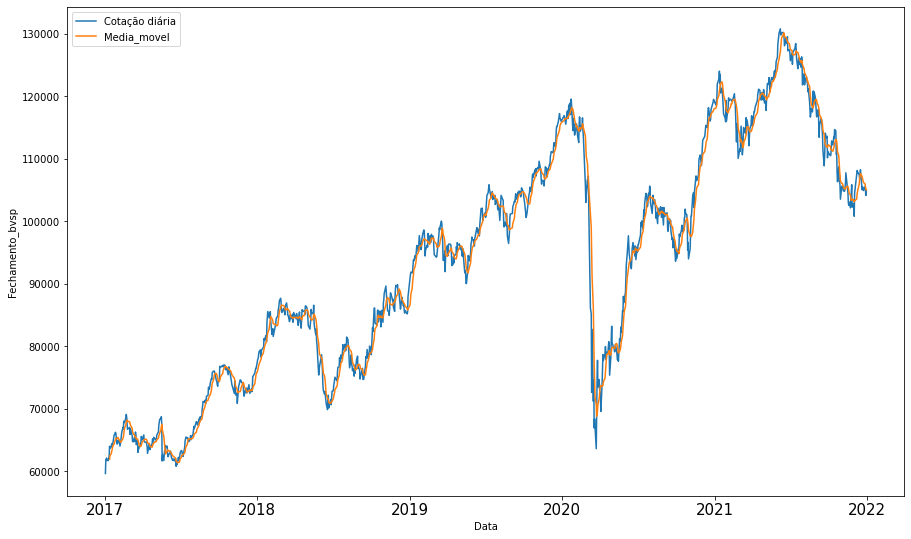

In [32]:
# media movel bvsp
df_1['m7_bvsp'] = df_1['Fechamento_bvsp'].rolling(7).mean()
plt.figure(figsize=(15, 9))
plt.xticks(fontsize=15)
sns.lineplot(x="Data",y="Fechamento_bvsp",
             label="Cotação diária", data=df_1,
             ci=None)

sns.lineplot(x="Data",y="m7_bvsp",
             label="Media_movel",
             data=df_1,
             ci=None)


<AxesSubplot:xlabel='Data', ylabel='Último'>

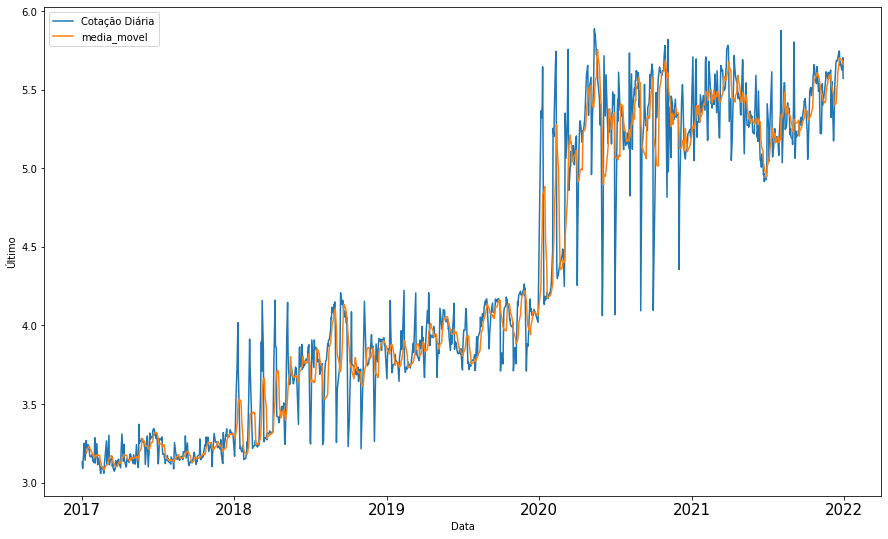

In [33]:
#media movel dolar

df_1['m7_dolar'] = df_1['Último'].rolling(7).mean()
plt.figure(figsize=(15, 9))
plt.xticks(fontsize=15)
sns.lineplot(x="Data",y="Último",
             label="Cotação Diária", data=df_1,
             ci=None)

sns.lineplot(x="Data",y="m7_dolar",
             label="media_movel",
             data=df_1,
             ci=None)

<AxesSubplot:xlabel='Último', ylabel='Fechamento_bvsp'>

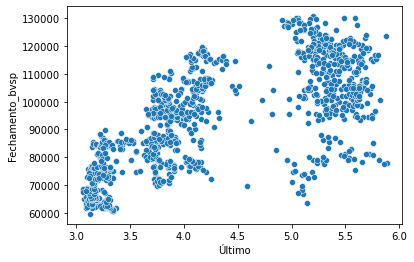

In [34]:
#gráfico de dispersão bvsp x dolar

sns.scatterplot(data=df_1, x="Último", y="Fechamento_bvsp")

<AxesSubplot:>

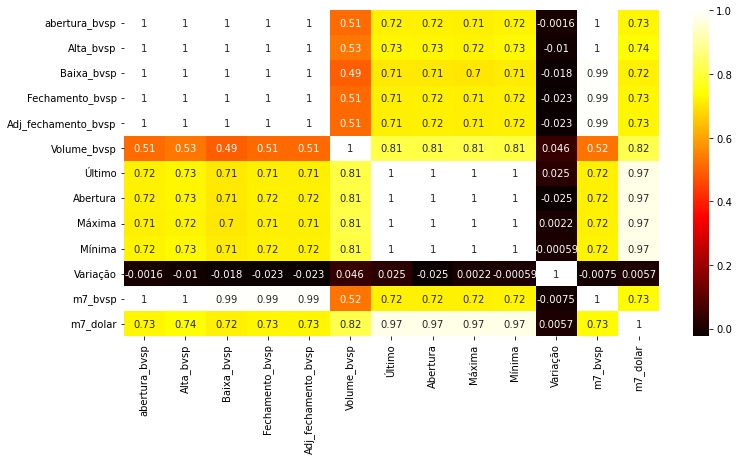

In [35]:
#matriz de correlação

plt.figure(figsize=(12,6))
corr=df_1.corr()
sns.heatmap(corr,annot=True,cmap='hot')

### Modelos de machine learning

In [42]:
# modelo de regressão linear
x=df_1[['Último']]
y=df_1['Fechamento_bvsp']

regr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)


mse = metrics.mean_squared_error(y_test, y_pred)
mae=metrics.mean_absolute_error(y_test, y_pred)

print(" R2 :",metrics.r2_score(y_test,y_pred))
print('MSE: ', mse)
print('MAE: ', mae)


plt.show()


 R2 : 0.5731643494254134
MSE:  159704691.10480654
MAE:  10424.489341373073


In [43]:
#modelo de regressor de arvore de decisões

x=df_1[['Último']]
y=df_1['Fechamento_bvsp']

regr_2 = DecisionTreeRegressor(max_depth=3)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.20, random_state=1)
regr_2.fit(X_train_2, y_train_2)
y_pred_2=regr_2.predict(X_test_2)


mse_2 = metrics.mean_squared_error(y_test_2, y_pred_2)
mae_2 = metrics.mean_absolute_error(y_test_2, y_pred_2)

print(" R2 :",metrics.r2_score(y_test_2,y_pred_2))
print('MSE: ', mse_2)
print('MAE: ', mae_2)


plt.show()


 R2 : 0.6702286303267987
MSE:  123387150.67021929
MAE:  8586.53263880972


In [44]:
#modelo KNeighborsRegressor

x=df_1[['Último']]
y=df_1['Fechamento_bvsp']

regr_4 = KNeighborsRegressor(n_neighbors=6)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(x, y, test_size=0.20, random_state=1)


regr_4.fit(X_train_4, y_train_4)
y_pred_4=regr_4.predict(X_test_4)

mse_4 = metrics.mean_squared_error(y_test_4, y_pred_4)

mae_4=metrics.mean_absolute_error(y_test_4, y_pred_4)



print(" R2 :",metrics.r2_score(y_test_4,y_pred_4))
print('MSE: ', mse_4)
print('MAE: ', mae_4)



plt.show()

 R2 : 0.6033505001126389
MSE:  148410250.57563132
MAE:  9109.750757575759


## Resultados 

### Regressão linear

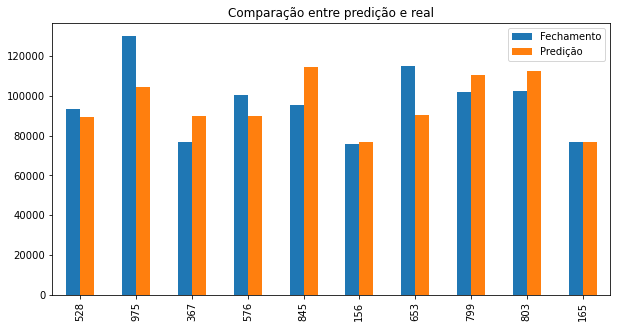

In [45]:
# Comparação em barras do modelo regressão linear

df_result = pd.DataFrame
df_result = X_test_2.copy()
df_result['Fechamento'] = y_test.copy()
df_result['Predição'] = y_pred
df_result['Data']=df_1['Data']




df_bar = df_result[['Fechamento', 'Predição']].head(10)
df_bar.plot(kind='bar',figsize=(10,5))
plt.title('Comparação entre predição e real')
plt.show()

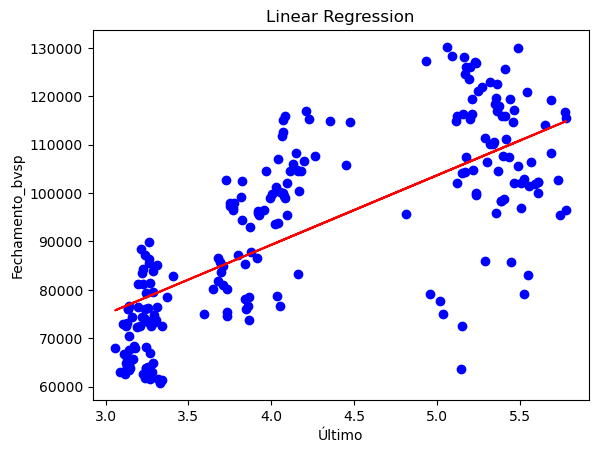

In [50]:
#visualização do modelo(vermelho) em meio á o gráfico de dispersão


plt.style.use('default')
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, regr.predict(X_test), color='red')
plt.title('Linear Regression')
plt.xlabel('Último')
plt.ylabel('Fechamento_bvsp')
plt.show()

<AxesSubplot:xlabel='Data', ylabel='Predição'>

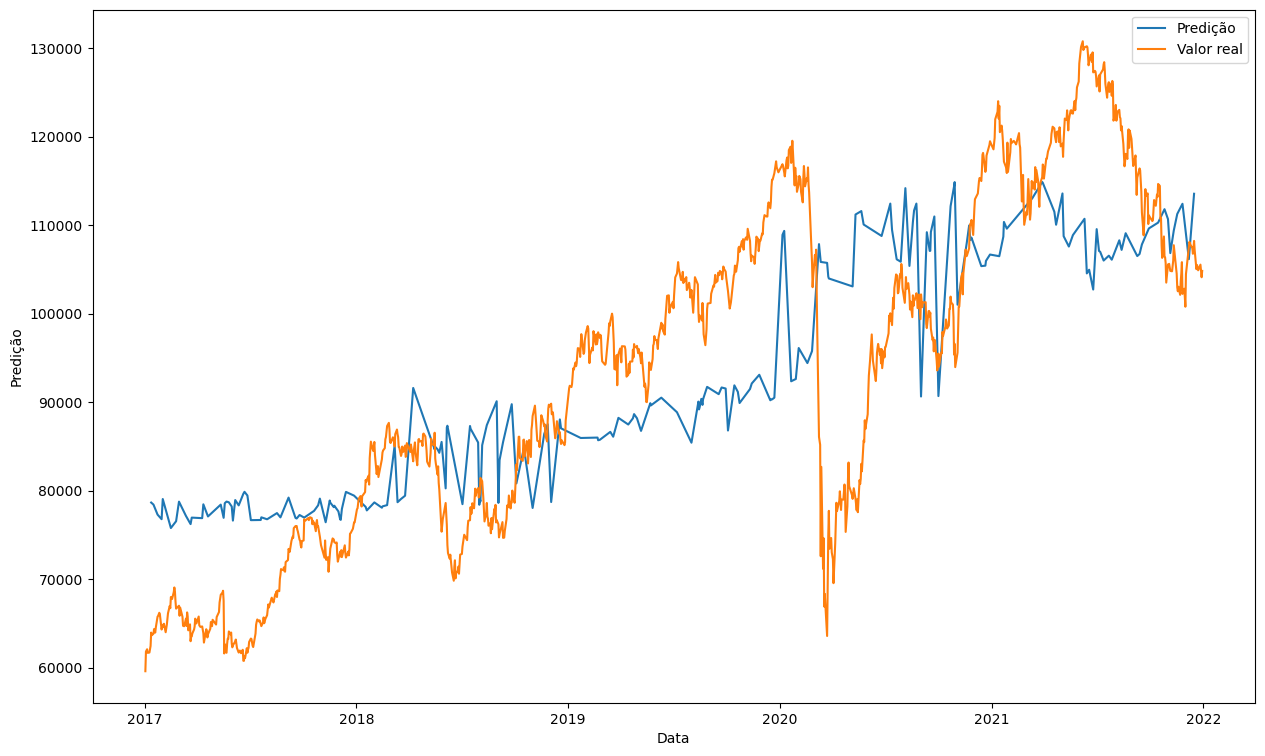

In [51]:
# comparação modelo x real(regressão linear)


plt.figure(figsize=(15, 9))

sns.lineplot(x="Data",y="Predição",
             label="Predição", data=df_result,
             ci=None)

sns.lineplot(x="Data",y="Fechamento_bvsp",
             label="Valor real",
             data=df_1,
             ci=None)

### árvore de decisões

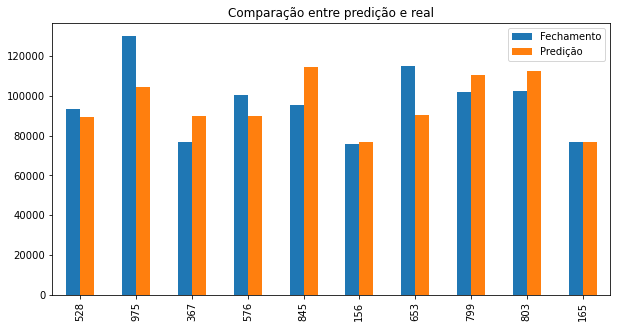

In [46]:
# Comparação em barras do modelo árvore de decisões
df_result_2 = pd.DataFrame
df_result_2 = X_test_2.copy()
df_result_2['Fechamento'] = y_test_2.copy()
df_result_2['Predição'] = y_pred_2
df_result_2['Data']=df_1['Data']




df_bar_2 = df_result[['Fechamento', 'Predição']].head(10)
df_bar_2.plot(kind='bar',figsize=(10,5))
plt.title('Comparação entre predição e real')
plt.show()

<AxesSubplot:xlabel='Data', ylabel='Predição'>

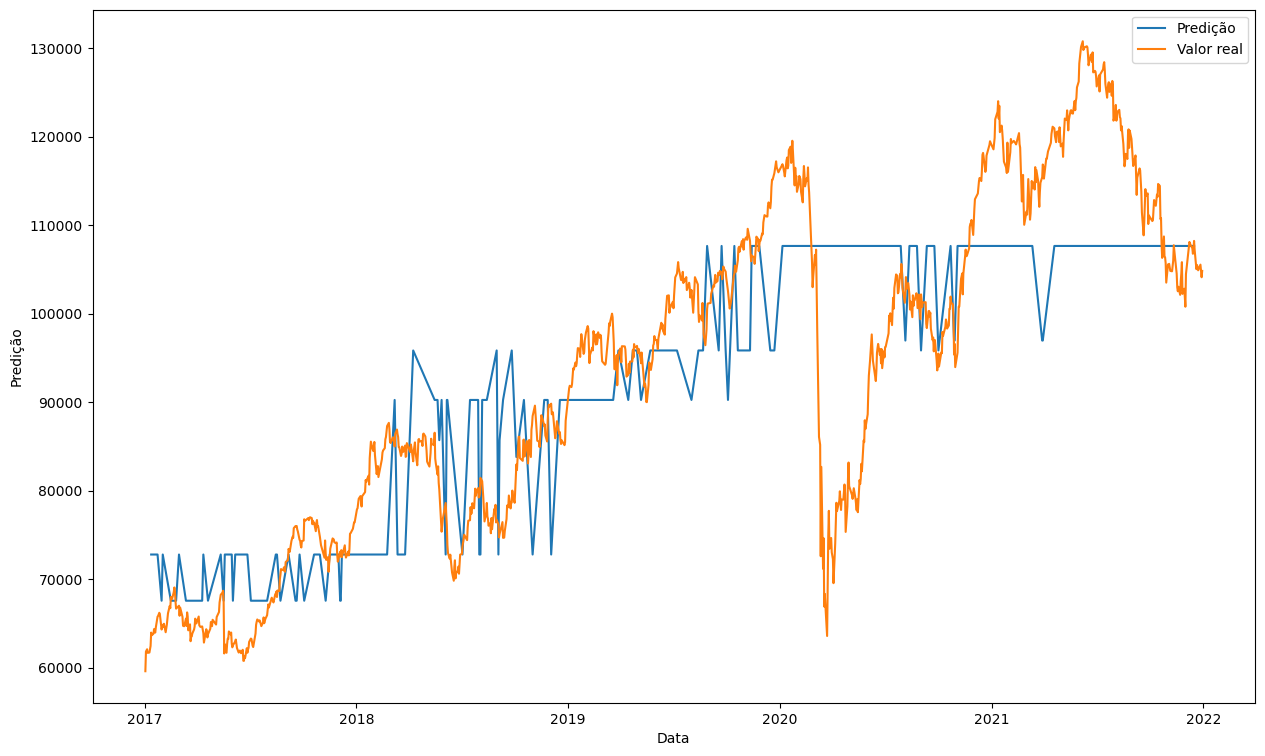

In [52]:
# comparação modelo x real(árvore de decisões)

plt.figure(figsize=(15, 9))

sns.lineplot(x="Data",y="Predição",
             label="Predição", data=df_result_2,
             ci=None)

sns.lineplot(x="Data",y="Fechamento_bvsp",
             label="Valor real",
             data=df_1,
             ci=None)

[Text(581.25, 606.375, 'X[0] <= 3.657\nmse = 338561730.214\nsamples = 880\nvalue = 93390.091'),
 Text(290.625, 433.125, 'X[0] <= 3.376\nmse = 71517828.662\nsamples = 231\nvalue = 72618.004'),
 Text(145.3125, 259.875, 'X[0] <= 3.155\nmse = 57278387.893\nsamples = 203\nvalue = 71001.552'),
 Text(72.65625, 86.625, 'mse = 23736423.544\nsamples = 69\nvalue = 67555.145'),
 Text(217.96875, 86.625, 'mse = 65284501.783\nsamples = 134\nvalue = 72776.194'),
 Text(435.9375, 259.875, 'X[0] <= 3.577\nmse = 18468555.133\nsamples = 28\nvalue = 84337.286'),
 Text(363.28125, 86.625, 'mse = 13276209.71\nsamples = 20\nvalue = 83793.3'),
 Text(508.59375, 86.625, 'mse = 28860114.688\nsamples = 8\nvalue = 85697.25'),
 Text(871.875, 433.125, 'X[0] <= 4.161\nmse = 225370606.436\nsamples = 649\nvalue = 100783.545'),
 Text(726.5625, 259.875, 'X[0] <= 3.918\nmse = 125848937.472\nsamples = 280\nvalue = 92279.054'),
 Text(653.90625, 86.625, 'mse = 110202584.685\nsamples = 178\nvalue = 90242.011'),
 Text(799.21875, 

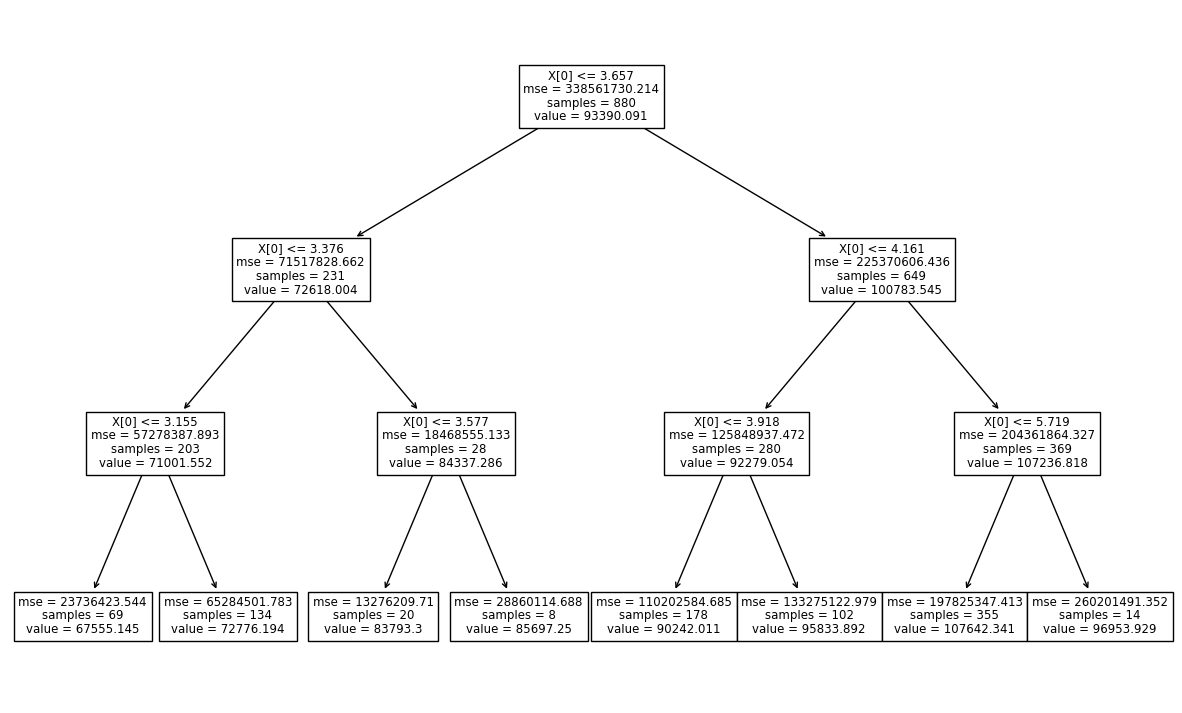

In [54]:
# visualização da arvore de decisões gerada

plt.figure(figsize=(15, 9))
 
 iris = load_iris()
 tree.plot_tree(regr_2)

### KNeighborsRegressor

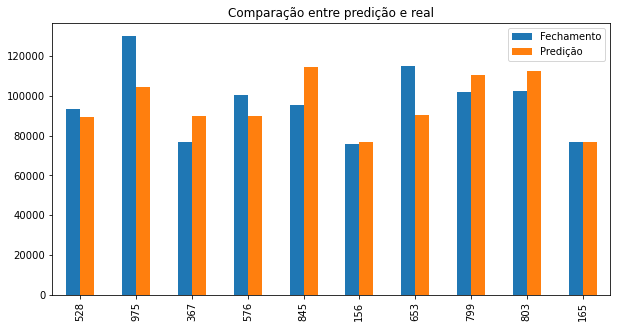

In [47]:
#  Comparação em barras do modelo árvore de decisões KNeighborsRegressor
df_result_4 = pd.DataFrame
df_result_4 = X_test_4.copy()


df_result_4['Fechamento'] = y_test_4.copy()
df_result_4['Predição'] = y_pred_4
df_result_4['Data']=df_1['Data']


df_bar_4 = df_result[['Fechamento', 'Predição']].head(10)
df_bar_4.plot(kind='bar',figsize=(10,5))
plt.title('Comparação entre predição e real')
plt.show()

<AxesSubplot:xlabel='Data', ylabel='Predição'>

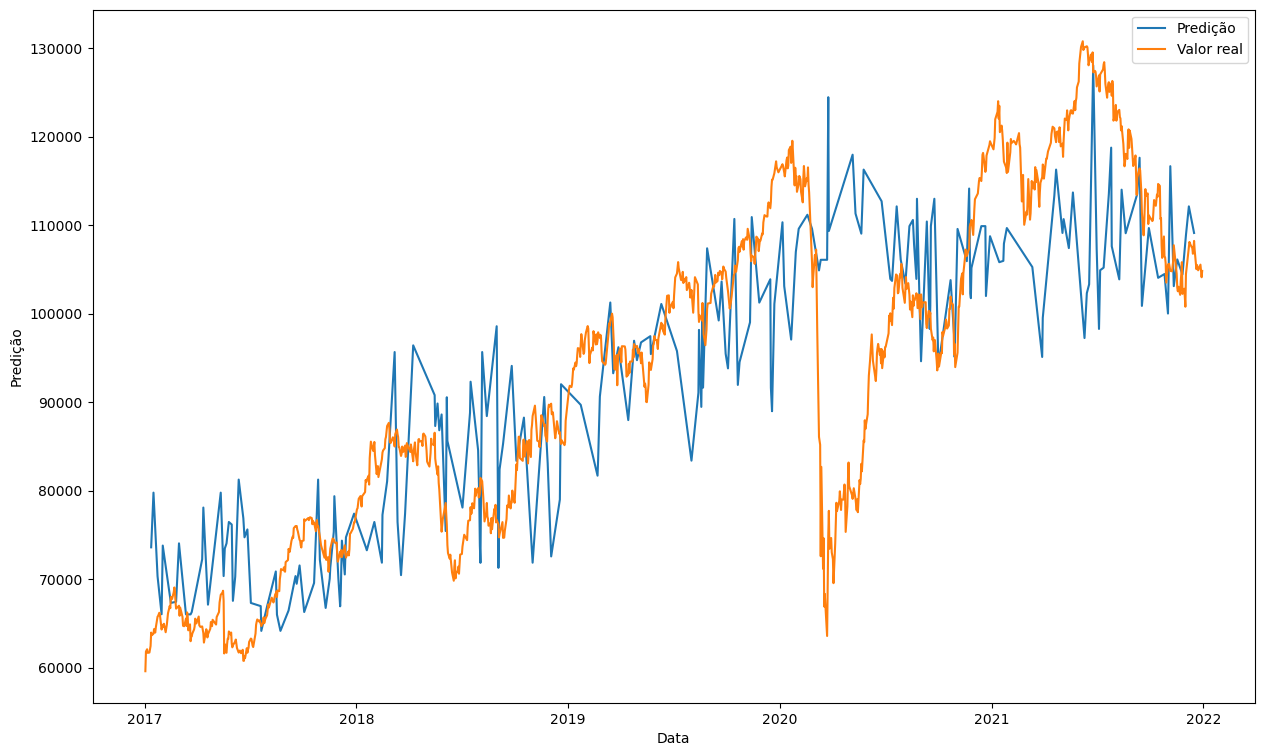

In [53]:
# comparação modelo x real(KNeighborsRegressor)

plt.figure(figsize=(15, 9))

sns.lineplot(x="Data",y="Predição",
             label="Predição", data=df_result_4,
             ci=None)

sns.lineplot(x="Data",y="Fechamento_bvsp",
             label="Valor real",
             data=df_1,
             ci=None)

In [95]:
# separando dia,mês e ano
df_1['dia'] = df_1['Data'].dt.day
df_1['mês'] = df_1['Data'].dt.month
df_1['Ano'] = df_1['Data'].dt.year

### Análise do período de 2020

In [96]:
# definindo periodo entre 2017 e 2019
df = df_1[(df_1['Ano'] >= 2017) & (df_1['Ano'] <= 2019)]

In [97]:
df

Data  abertura_bvsp  Alta_bvsp  Baixa_bvsp  Fechamento_bvsp  \
0   2017-01-02        60227.0    60227.0     59371.0          59589.0   
1   2017-01-03        59631.0    61815.0     59631.0          61814.0   
2   2017-01-05        61594.0    62409.0     61594.0          62071.0   
3   2017-01-06        62072.0    62072.0     61396.0          61665.0   
4   2017-01-09        61680.0    62112.0     61307.0          61700.0   
..         ...            ...        ...         ...              ...   
654 2019-12-20       115133.0   115171.0    114526.0         115121.0   
655 2019-12-23       115119.0   115863.0    114964.0         115863.0   
656 2019-12-26       115864.0   117220.0    115673.0         117203.0   
657 2019-12-27       117205.0   117803.0    115995.0         116534.0   
658 2019-12-30       116530.0   117086.0    115790.0         115964.0   

     Adj_fechamento_bvsp  Volume_bvsp  Último  Abertura  Máxima  Mínima  \
0                59589.0       808700  3.1295    3.1520  3.1638  3.1275   
1                61814.0      3328300  3.0900    3.1095  3.1238  3.0900   
2                62071.0      3313000  3.1765    3.1772  3.1772  3.1765   
3                61665.0      2374800  3.2506    3.2273  3.2553  3.2151   
4                61700.0      2480800  3.1416    3.1477  3.1488  3.1223   
..                   ...          ...     ...       ...     ...     ...   
654             115121.0      6887400  4.1025    4.0706  4.1025  4.0576   
655             115863.0      3995200  4.0836    4.1015  4.1015  4.0571   
656             117203.0      3788900  4.0560    4.0827  4.0827  4.0453   
657             116534.0      3905900  4.0459    4.0567  4.0614  4.0339   
658             115964.0      3667900  4.0195    4.0484  4.0484  4.0084   

     Variação        m7_bvsp  m7_dolar   Ano  dia  mês  
0     -0.0068            NaN       NaN  2017    2    1  
1     -0.0061            NaN       NaN  2017    3    1  
2     -0.0001            NaN       NaN  2017    5    1  
3      0.0074            NaN       NaN  2017    6    1  
4     -0.0020            NaN       NaN  2017    9    1  
..        ...            ...       ...   ...  ...  ...  
654    0.0081  113406.285714  4.081371  2019   20   12  
655   -0.0046  113929.571429  4.080343  2019   23   12  
656   -0.0068  114592.142857  4.072886  2019   26   12  
657   -0.0025  115254.714286  4.070414  2019   27   12  
658   -0.0065  115733.000000  4.062943  2019   30   12  

[659 rows x 17 columns]

In [98]:
# definindo periodo entre 2020 e 2021

df_2 = df_1[(df_1['Ano'] >= 2020) & (df_1['Ano'] <= 2021)]

<AxesSubplot:>

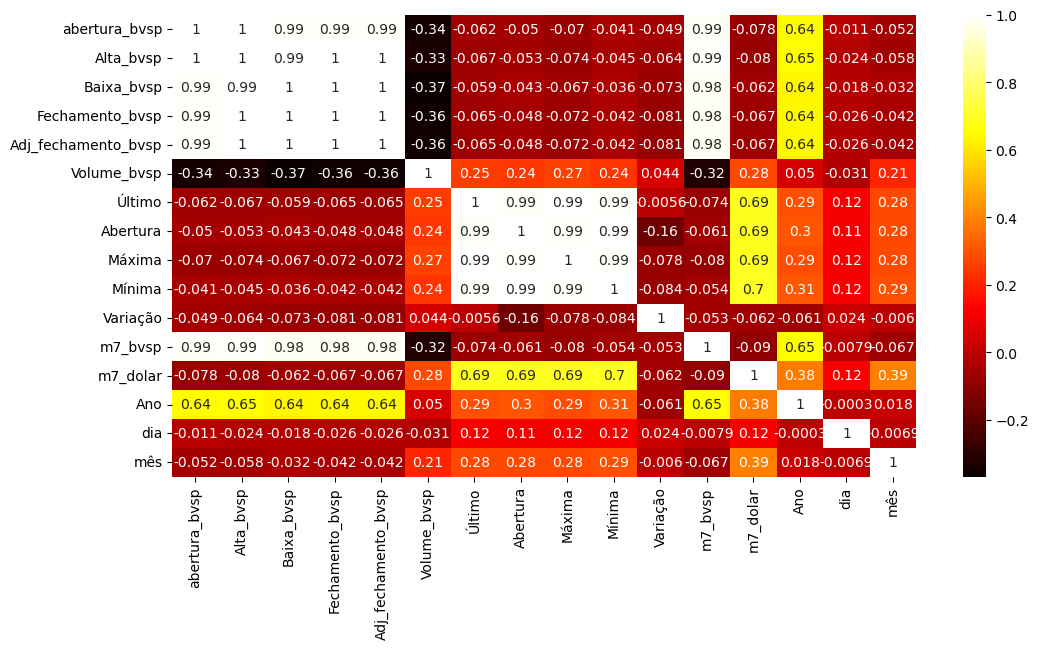

In [99]:
# matriz de correlação df

plt.figure(figsize=(12,6))
corr=df_2.corr()
sns.heatmap(corr,annot=True,cmap='hot')

<AxesSubplot:>

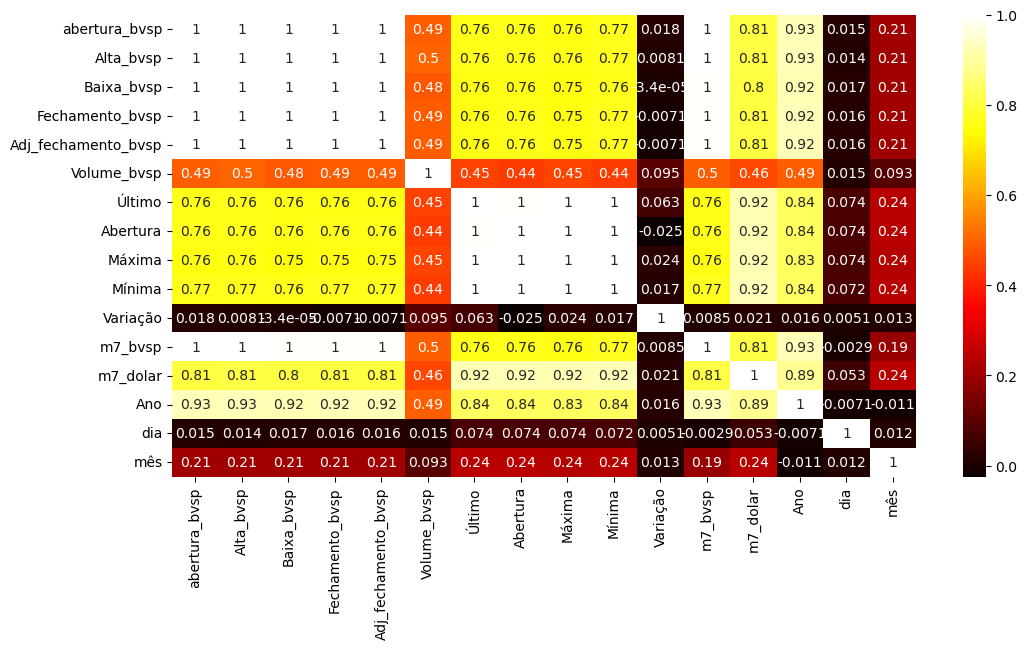

In [103]:
# matriz de correlação df_2

plt.figure(figsize=(12,6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='hot')